# WeatherPy
----

#### Analysis
* Tempertures rise the as you get closer to the equator.  
* The northern hemisphere has a wider spread of temperatures vs the southern hemisphere.  This potentially could be a result of spring weather. 
* Humidity, cloudiness, and wind speed are not affected by latitude overall or for either the northern or southern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime,timedelta
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name=[]
city_id =[]
country=[]
lat=[]
long=[]
temp=[]
clouds=[]
humidity=[]
wind_speed=[]
max_temp=[]
dt=[]



for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ 'imperial'
    weather_response1 = requests.get(query_url)
    weather1_json = weather_response1.json()
    try:
        city_name.append(weather1_json['name'])
        city_id.append(weather1_json['id'])
        country.append(weather1_json['sys']['country'])
        dt.append(weather1_json['dt'])
        temp.append(weather1_json['main']['temp'])
        max_temp.append(weather1_json['main']['temp_max'])
        lat.append(weather1_json['coord']['lat'])
        long.append(weather1_json['coord']['lon'])
        clouds.append(weather1_json['clouds']['all'])
        humidity.append(weather1_json['main']['humidity'])
        wind_speed.append(weather1_json['wind']['speed'])
        
        print(f"{city}: {weather1_json['id']}")
    except KeyError:
        print(f"{city} is not available")
        

egvekinot: 4031742
ushuaia: 3833367
punta arenas: 3874787
yellowknife: 6185377
atambua: 1651103
qaanaaq: 3831208
hermanus: 3366880
bredasdorp: 1015776
avarua: 4035715
kamenskoye is not available
attawapiskat is not available
puerto lleras: 3671424
amderma is not available
blagoyevo: 576093
fort nelson: 5955902
ambulu: 1621313
port alfred: 964432
marcona is not available
knysna: 988698
rikitea: 4030556
yarada: 1252783
ribeira grande: 3372707
vanavara: 2013727
husum: 2897132
port lincoln: 2063036
mapiripan: 3792394
victoria: 1819729
isangel: 2136825
ust-nera: 2120048
longyearbyen: 2729907
new norfolk: 2155415
yulara: 6355222
bandarbeyla: 64814
taolanaro is not available
vulcan: 662432
chokurdakh: 2126123
nizhneyansk is not available
severo-kurilsk: 2121385
north bend: 5742974
tiznit: 2527087
yermakovskoye: 1485904
busselton: 2075265
lebu: 3883457
chulym: 1507679
mataura: 6201424
constitucion: 3893726
harper: 2276492
tasiilaq: 3424607
inirida: 3671450
havre-saint-pierre: 5972291
mayo: 436

det udom: 1610940
nuuk: 3421319
san patricio: 4726521
bowmore: 4486983
oshnaviyeh: 121795
yokadouma: 2220853
gambela: 337405
mount isa: 2065594
chimbote: 3698304
grindavik: 3416888
te anau: 2181625
sao jose da coroa grande: 3388456
goksun: 314188
tumannyy is not available
ust-kamchatsk is not available
marivan: 97572
kanniyakumari: 1268008
naze: 1855540
sukaraja: 1626313
kamenka: 553766
aranos: 3358666
tvoroyri: 2611060
batagay: 2027044
urumqi: 1529102
poum: 2138555
asaba: 2349276
san jose: 5392171
dunedin: 2191562
karamay is not available
talnakh: 1490256
meyungs is not available
ambikapur: 1278827
saint simons: 4220862
flic en flac: 934517
plaine magnien: 934169
derzhavinsk: 1524606
san vicente: 3428068
bollnas: 2720679
piet retief: 965241
mahanje: 155285
kachug: 2023333
nyimba: 900056
viedma: 3832899
zhemchuzhnyy is not available
shubarshi: 608270
ust-tsilma: 477940
debre sina: 339692
teneguiban is not available
brockville: 5909294
nakamura: 1855891
ostrow mazowiecka: 762850
samusu 

In [4]:
len(max_temp)

571

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict={'city': city_name,
           'city_id':city_id,
              'country':country,
              'utc_dt':dt,
           'latitude': lat,
           'longitude': long,
           'temperature': temp,
           'max_temp':max_temp,
           'cloudiness': clouds,
           'humidity':humidity,
           'wind_speed':wind_speed,
             }
weather_dict
weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv(r'weather_search.csv',index=False)
weather_df

,city,city_id,country,utc_dt,latitude,longitude,temperature,max_temp,cloudiness,humidity,wind_speed
0,Egvekinot,4031742,RU,1619410535,66.3167,-179.1667,29.05,29.05,15,89,0.43
1,Ushuaia,3833367,AR,1619410536,-54.8000,-68.3000,46.40,46.40,75,76,12.66
2,Punta Arenas,3874787,CL,1619409996,-53.1500,-70.9167,44.29,44.60,90,93,5.75
3,Yellowknife,6185377,CA,1619410536,62.4560,-114.3525,6.40,6.80,90,78,12.66
4,Atambua,1651103,ID,1619410537,-9.1061,124.8925,82.76,82.76,26,45,2.44
...,...,...,...,...,...,...,...,...,...,...,...
566,Kalmunai,1242110,LK,1619410650,7.4167,81.8167,84.58,84.58,97,67,6.31
567,Balikpapan,1650527,ID,1619410629,-1.2675,116.8289,85.95,85.95,43,61,6.33
568,Kasempa,912628,ZM,1619410727,-13.4584,25.8338,59.09,59.09,15,79,4.74
569,Santiago del Estero,3835869,AR,1619410728,-27.7951,-64.2615,59.86,59.86,0,67,6.40


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
len(weather_df.loc[weather_df['humidity']>100])

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

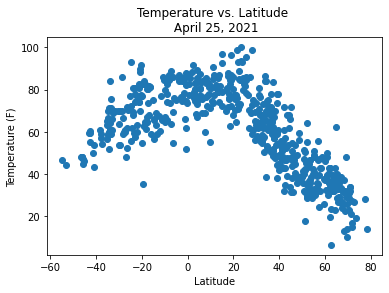

In [7]:
x=weather_df['latitude']
y=weather_df['temperature']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude \n April 25, 2021")
plt.savefig('Temp_vs_Lat')
plt.show()

### Analysis
- As expected, tempertures rise the as you get closer to the equator.  The northern hemispere is still in early sprig and therefore has lower temperatures.  (Analysis 4/25)

## Latitude vs. Humidity Plot

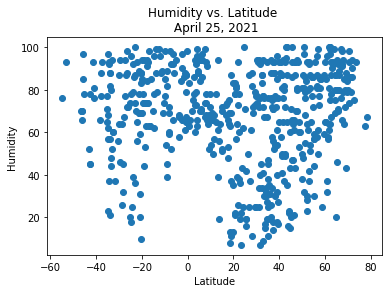

In [8]:
x=weather_df['latitude']
y=weather_df['humidity']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude \n April 25, 2021")
plt.savefig('Humidity_vs_Lat')
plt.show()

 ### Analysis
 - Latitude doesn't appear to have an effect on high levels of humidity.  Although lower humidity levels are more prominent in the northern hemisphere, which could be a seasonal effect. (Analysis 4/25)

## Latitude vs. Cloudiness Plot

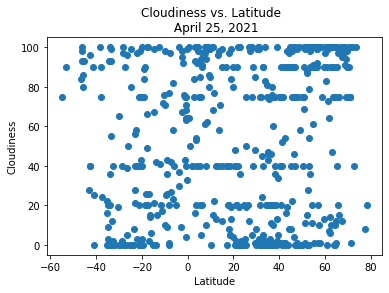

In [9]:
x=weather_df['latitude']
y=weather_df['cloudiness']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude  \n April 25, 2021")
plt.savefig('Cloudiness_vs_Lat')
plt.show()

### Analysis
- Latitude doesn't have any affect on cloudiness.  (Analysis 4/25)

## Latitude vs. Wind Speed Plot

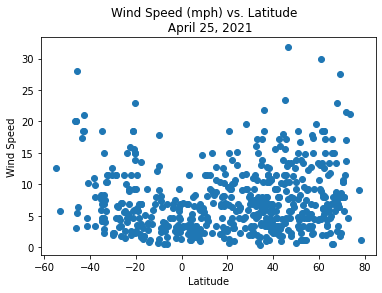

In [10]:
x=weather_df['latitude']
y=weather_df['wind_speed']

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude  \n April 25, 2021")
plt.savefig('WindSpeed_vs_Lat')
plt.show()

### Analysis
- There doesn't appear to be any relationship between wind speed and latitude. (Analysis 4/25)

## Linear Regression

In [11]:
#create dataframes for North & South for simplier analysis
northern_hem_df = weather_df.loc[weather_df['latitude']>=0]
#northern_hem_df

southern_hem_df = weather_df.loc[weather_df['latitude']<=0]
southern_hem_df

,city,city_id,country,utc_dt,latitude,longitude,temperature,max_temp,cloudiness,humidity,wind_speed
1,Ushuaia,3833367,AR,1619410536,-54.8000,-68.3000,46.40,46.40,75,76,12.66
2,Punta Arenas,3874787,CL,1619409996,-53.1500,-70.9167,44.29,44.60,90,93,5.75
4,Atambua,1651103,ID,1619410537,-9.1061,124.8925,82.76,82.76,26,45,2.44
6,Hermanus,3366880,ZA,1619410505,-34.4187,19.2345,60.01,60.01,1,92,7.00
7,Bredasdorp,1015776,ZA,1619409996,-34.5322,20.0403,51.80,51.80,93,93,4.61
...,...,...,...,...,...,...,...,...,...,...,...
558,Waingapu,1622318,ID,1619410609,-9.6567,120.2641,84.85,84.85,25,54,12.97
559,Singaraja,1626932,ID,1619410636,-8.1120,115.0882,86.58,86.58,0,60,3.27
567,Balikpapan,1650527,ID,1619410629,-1.2675,116.8289,85.95,85.95,43,61,6.33
568,Kasempa,912628,ZM,1619410727,-13.4584,25.8338,59.09,59.09,15,79,4.74


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

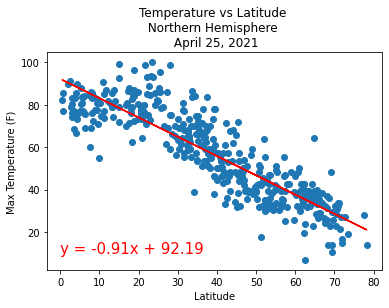

In [12]:
x=northern_hem_df['latitude']
y=northern_hem_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

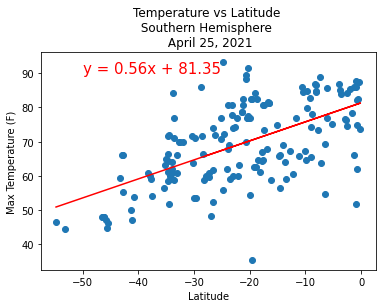

In [13]:
x=southern_hem_df['latitude']
y=southern_hem_df['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Temperature vs Latitude \n Southern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.savefig('Temp_vs_Lat_SouthernHem')
plt.show()

### Analysis
- As stated above, latitude has a directly correlated to temperatures.  The closer you are to the equator, the higher the temperatures.  This is evidenced with the regression line for both the northern and southern hemispheres graphs. (Analysis 4/25)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

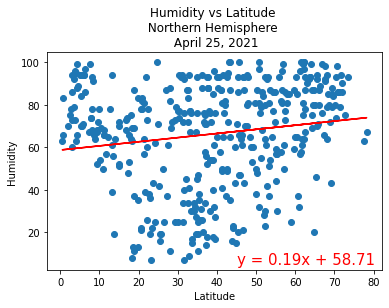

In [14]:
x=northern_hem_df['latitude']
y=northern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(45,5),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_NorthernHem')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

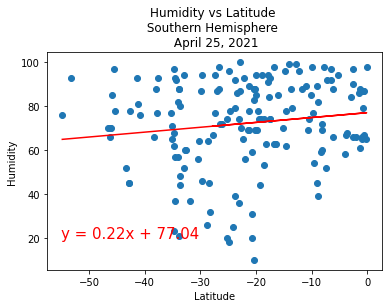

In [15]:
x=southern_hem_df['latitude']
y=southern_hem_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude \n Southern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('Humidity_vs_Lat_SouthernHem')
plt.show()

### Analysis
- Latitude no affect on humidity for either the northern or southern hemisphere.  This is confirmed with the respective low r-values, northern (0.11) and southern (0.3).  (Analysis 4/25)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

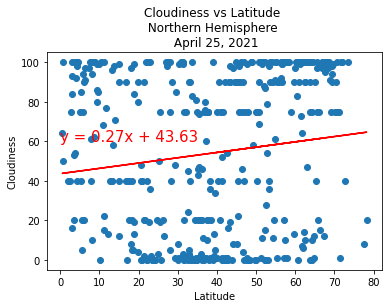

Linear regression: y = 0.27x + 43.63


In [16]:
x=northern_hem_df['latitude']
y=northern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(0,60),fontsize=15,color='red')
plt.savefig('Cloudiness_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

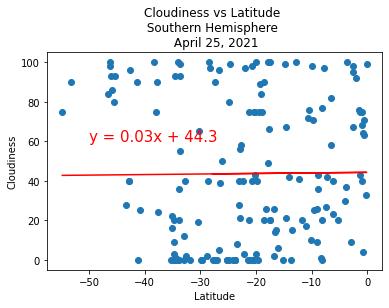

Linear regression: y = 0.03x + 44.3


In [17]:
x=southern_hem_df['latitude']
y=southern_hem_df['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude \n Southern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(-50,60),fontsize=15,color='red')
plt.savefig('Cloudiness_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

### Analysis
Latitude no affect on cloudiness for either the northern or southern hemisphere. This is confirmed with the respective low r-values, northern (0.34) and southern (0.58).  The northern hemisphere's higher r-value may be due to seasonality as it is early spring.  (Analysis 4/25)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

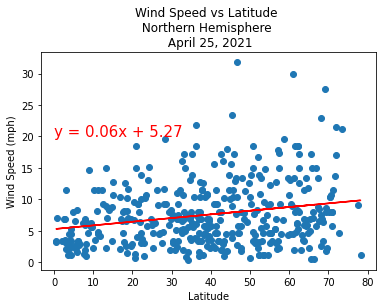

Linear regression: y = 0.06x + 5.27


In [18]:
x=northern_hem_df['latitude']
y=northern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Northern Hemisphere  \n April 25, 2021")
plt.annotate(line_eq,(0,20),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_NorthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

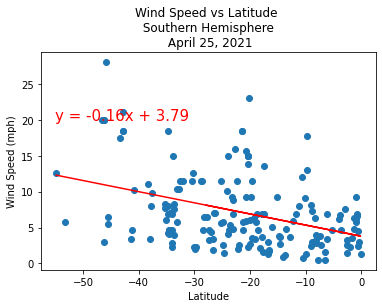

Linear regression: y = -0.16x + 3.79


In [19]:
x=southern_hem_df['latitude']
y=southern_hem_df['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Latitude \n Southern Hemisphere \n April 25, 2021")
plt.annotate(line_eq,(-55,20),fontsize=15,color='red')
plt.savefig('WindSpeed_vs_Lat_SouthernHem')
plt.show()
print(f"Linear regression: {line_eq}")

### Analysis
Wind speed is not related to latitude.   This is confirmed with the respective low r-values, northern (0.05) and southern (0.07). (Analysis 4/25)